In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

from astropy.modeling.models import NFW
import astropy.units as u
from astropy import cosmology
import sympy as sp
data = pd.read_csv("/Users/shreyanakum/Desktop/K Coefficient/Paper HI Column Density & Redshift of Observational Data MODIFIED - Sheet1.csv")

# Diffusivity Coefficient from SDSS Data w/ Error Bars

In [21]:
def diffusivity_coefficient(N_H, circular_velocity, halo_mass, M_star_i, star_formation_rate):
    nums = 1e18 * 1e30
    v_circ_norm = 200/circular_velocity
    N_H_fr = np.power(10, N_H)
    #return_value = nums * np.power(N_H_fr, -1) * (M_star_i) / np.power(v_circ_norm, 2)
    return nums * np.power(N_H_fr, -1) * (1/star_formation_rate) * np.power(v_circ_norm, 2)

In [22]:
def error_dy_value(N_H_low,N_H_high):
    for x in range(0,33):
        N_H_amt_low = diffusivity_coefficient(N_H_low[x], velocity_vals, predictedM, M_star_d, sfr)
        N_H_amt_high = diffusivity_coefficient(N_H_high[x], velocity_vals, predictedM, M_star_d, sfr)
        return ((N_H_amt_high-N_H_amt_low))

In [23]:
def sfr_atm(age, stellar_mass): 
    return stellar_mass/age

In [24]:
diff_coeffs = []
for i in range(0,33): 
    diff_coeffs.append(diffusivity_coefficient(N_H[i], velocity_vals[i], predictedM[i], M_star_d[i], sfr[i]))

In [25]:
print(diff_coeffs)
print(len(diff_coeffs))

[4.863313023320381e+28, 2.918029187265663e+28, 1.0633321821074404e+29, 1.9504643751374936e+28, 1.1570558894212647e+30, 1.148059177411108e+27, 6.325760157508916e+27, 2.417033109915669e+29, 2.465422735674595e+28, 1.6719577991360764e+27, 2.4994129573374594e+29, 1.0099176881907184e+28, 1.4990331524745091e+29, 5.362538500903624e+29, 2.608201335180833e+30, 7.087889762752873e+27, 8.055675606171463e+28, 9.96469135428087e+28, 5.627945145048884e+28, 2.578824046263642e+28, 1.1398359259432645e+31, 8.055941130662073e+29, 7.37486430712444e+28, 3.900496431171076e+29, 9.070416431660122e+27, 3.800011068111928e+29, 2.4185722006010198e+30, 1.697514137126323e+27, 1.710824840558586e+30, 1.0385160156430671e+28, 3.335096555475075e+28, 1.120789719451305e+30, 6.805182421175025e+28]
33


In [26]:
print(diff_coeffs)

[4.863313023320381e+28, 2.918029187265663e+28, 1.0633321821074404e+29, 1.9504643751374936e+28, 1.1570558894212647e+30, 1.148059177411108e+27, 6.325760157508916e+27, 2.417033109915669e+29, 2.465422735674595e+28, 1.6719577991360764e+27, 2.4994129573374594e+29, 1.0099176881907184e+28, 1.4990331524745091e+29, 5.362538500903624e+29, 2.608201335180833e+30, 7.087889762752873e+27, 8.055675606171463e+28, 9.96469135428087e+28, 5.627945145048884e+28, 2.578824046263642e+28, 1.1398359259432645e+31, 8.055941130662073e+29, 7.37486430712444e+28, 3.900496431171076e+29, 9.070416431660122e+27, 3.800011068111928e+29, 2.4185722006010198e+30, 1.697514137126323e+27, 1.710824840558586e+30, 1.0385160156430671e+28, 3.335096555475075e+28, 1.120789719451305e+30, 6.805182421175025e+28]


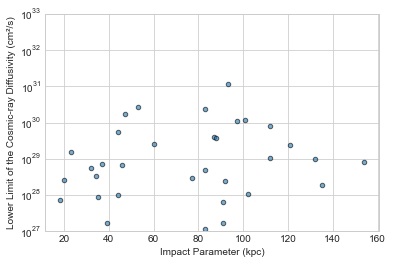

In [27]:
R = data['R']
N_H = data['N_H']
M_star_d = data['log M_*']
#sfr = data['SFR']
galaxy_age = data['Age Gyr']
sfr = sfr_atm(galaxy_age,M_star_d)
velocity_vals = np.array([134.05430348763306, 510.21258348149706, 183.43068548075482, 618.451524921208, 110.04104426428928, 513.2321384813996, 234.47085431245546, 230.4213140053146, 102.33555196284, 435.22941800909996, 119.21853483839298, 154.43032711839197, 149.4959744149872, 181.09407352030155, 159.3110992310241, 330.3523655693238, 197.2776795711477, 227.49075690415384, 185.00543166922802, 146.1938044781218, 124.30436763865931, 107.24392367586164, 236.78327050423655, 150.3368062665032, 265.06291167573903, 189.91927258930735, 163.88186723392656, 346.2770941360653, 116.13182974316351, 524.9985013624732, 180.67373358423535, 129.57960283661137, 241.937639758548])

y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
plt.scatter(R, y, s=20, alpha=0.6, edgecolor='black', linewidth=1)
#plt.plot(R, y, zorder=100)
#N_H_low = data['log N_H low']
#y = diffusivity_coefficient(N_H_low, velocity_vals, predictedM, M_star_d, sfr)
#plt.scatter(R, y, s=20, alpha=0.6, edgecolor='black', linewidth=1, color='orange')

#N_H_high = data['log N_H high']
#y = diffusivity_coefficient(N_H_high, velocity_vals, predictedM, M_star_d, sfr)
#plt.scatter(R, y, s=20, alpha=0.6, edgecolor='black', linewidth=1)

plt.yscale('log')
plt.ylim(1e27,1e33)
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')
plt.show()

Text(0, 0.5, 'Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

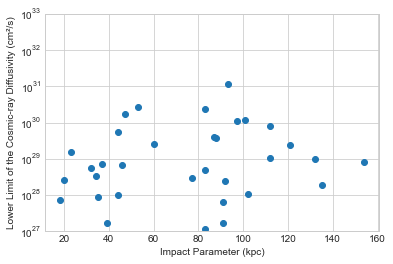

In [28]:
R = data['R']
N_H = data['N_H']
M_star_d = data['log M_*']
galaxy_age = data['Age Gyr']
sfr = sfr_atm(galaxy_age,M_star_d)
velocity_vals = np.array([134.05430348763306, 510.21258348149706, 183.43068548075482, 618.451524921208, 110.04104426428928, 513.2321384813996, 234.47085431245546, 230.4213140053146, 102.33555196284, 435.22941800909996, 119.21853483839298, 154.43032711839197, 149.4959744149872, 181.09407352030155, 159.3110992310241, 330.3523655693238, 197.2776795711477, 227.49075690415384, 185.00543166922802, 146.1938044781218, 124.30436763865931, 107.24392367586164, 236.78327050423655, 150.3368062665032, 265.06291167573903, 189.91927258930735, 163.88186723392656, 346.2770941360653, 116.13182974316351, 524.9985013624732, 180.67373358423535, 129.57960283661137, 241.937639758548])

y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)

plt.scatter(R, y)
#plt.scatter(R, y, linewidth = 2, linestyle = 'dashed')

plt.yscale('log')
plt.ylim(1e27,1e33)
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

In [35]:
galaxy_age = data['Age Gyr']
sfr = sfr_atm(galaxy_age,M_star_d)
y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
y_high = diffusivity_coefficient(N_H_low, velocity_vals, predictedM, M_star_d, sfr)
y_low = diffusivity_coefficient(N_H_high, velocity_vals, predictedM, M_star_d, sfr)

dy = error_dy_value(N_H_low,N_H_high)
plt.yscale('log')
plt.ylim(1e27,1e33)
plt.errorbar(R, y, yerr =[y-y_low,y_high-y], fmt='.k');
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

NameError: name 'N_H_low' is not defined

In [30]:
galaxy_age = data['Age Gyr']
sfr = sfr_atm(galaxy_age,M_star_d)
y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
y_high = diffusivity_coefficient(N_H_low, velocity_vals, predictedM, M_star_d, sfr)
y_low = diffusivity_coefficient(N_H_high, velocity_vals, predictedM, M_star_d, sfr)

#----
sfr_2 = data['SFR']
y_t = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr_2)
y_high_t = diffusivity_coefficient(N_H_low, velocity_vals, predictedM, M_star_d, sfr_2)
y_low_t = diffusivity_coefficient(N_H_high, velocity_vals, predictedM, M_star_d, sfr_2)

dy = error_dy_value(N_H_low,N_H_high)
plt.yscale('log')
plt.ylim(1e27,1e33)
plt.errorbar(R, y, yerr =[(y-y_low),(y_high-y)], fmt='.k');

dy = error_dy_value(N_H_low,N_H_high)
plt.yscale('log')
plt.ylim(1e27,1e33)
plt.errorbar(R, y_t, yerr =[y_t-y_low_t,y_high_t-y_t], fmt='.c');


plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

NameError: name 'N_H_low' is not defined

# More Plots

Diffusivity Coeff. vs. Stellar Mass

Text(0, 0.5, 'Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

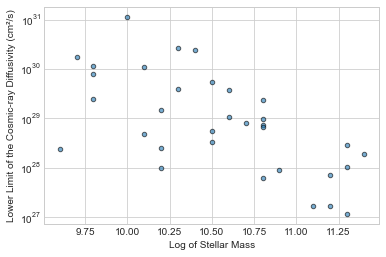

In [31]:
R = data['R']
N_H = data['N_H']
M_star_d = data['log M_*']
galaxy_age = data['Age Gyr']
sfr = sfr_atm(galaxy_age,M_star_d)
velocity_vals = np.array([134.05430348763306, 510.21258348149706, 183.43068548075482, 618.451524921208, 110.04104426428928, 513.2321384813996, 234.47085431245546, 230.4213140053146, 102.33555196284, 435.22941800909996, 119.21853483839298, 154.43032711839197, 149.4959744149872, 181.09407352030155, 159.3110992310241, 330.3523655693238, 197.2776795711477, 227.49075690415384, 185.00543166922802, 146.1938044781218, 124.30436763865931, 107.24392367586164, 236.78327050423655, 150.3368062665032, 265.06291167573903, 189.91927258930735, 163.88186723392656, 346.2770941360653, 116.13182974316351, 524.9985013624732, 180.67373358423535, 129.57960283661137, 241.937639758548])

y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
plt.yscale('log')
plt.scatter(M_star_d, y, s=20, alpha=0.6, edgecolor='black', linewidth=1)
plt.xlabel('Log of Stellar Mass')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

Diffusivity Coeff. vs. Redshift

Text(0, 0.5, 'Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

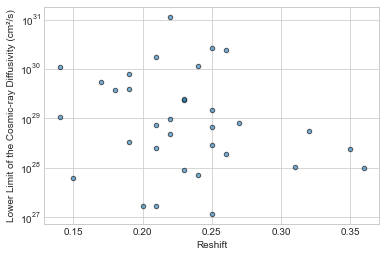

In [32]:
R = data['R']
N_H = data['N_H']
M_star_d = data['log M_*']
galaxy_age = data['Age Gyr']
redshift_z = data['z']
sfr = sfr_atm(galaxy_age,M_star_d)
velocity_vals = np.array([134.05430348763306, 510.21258348149706, 183.43068548075482, 618.451524921208, 110.04104426428928, 513.2321384813996, 234.47085431245546, 230.4213140053146, 102.33555196284, 435.22941800909996, 119.21853483839298, 154.43032711839197, 149.4959744149872, 181.09407352030155, 159.3110992310241, 330.3523655693238, 197.2776795711477, 227.49075690415384, 185.00543166922802, 146.1938044781218, 124.30436763865931, 107.24392367586164, 236.78327050423655, 150.3368062665032, 265.06291167573903, 189.91927258930735, 163.88186723392656, 346.2770941360653, 116.13182974316351, 524.9985013624732, 180.67373358423535, 129.57960283661137, 241.937639758548])

y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
plt.yscale('log')
plt.scatter(redshift_z, y, s=20, alpha=0.6, edgecolor='black', linewidth=1)
plt.xlabel('Reshift')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

# Finding Halo Mass from Stellar Mass

Function that returns halo mass vs. stellar mass plot based on given precision and data

In [33]:
def halo_mass(precision, logm):
    halo_mass_list = np.logspace(10, 15, precision)
    print (halo_mass_list)
    
    galaxy_mass_R = []
    for x in halo_mass_list:
        M1 = np.power(10, 11.884)
        beta = -1.057
        gamma = 0.556
        mMot = 2*0.02820
        MMo = x/M1
        galaxy_mass_R.append(x*mMot*(np.power((np.power(MMo, beta) + np.power(MMo, gamma)), -1)))
    
    predicted_M = []
    for x in logm:
        halo_mass_list = np.logspace(10, 15, precision)
        predicted_stellar_mass_list = np.log10(galaxy_mass_R)
        mask = predicted_stellar_mass_list >= x
        predicted_M.append(halo_mass_list[mask][0])
        
    #print(predicted_stellar_mass_list)
    plt.plot(np.log10(halo_mass_list), predicted_stellar_mass_list)
    plt.xlabel("Halo Mass")
    plt.ylabel("Stellar Mass")
    return predicted_M

The Plot

[1.00000000e+10 1.00115207e+10 1.00230547e+10 ... 9.97699834e+14
 9.98849255e+14 1.00000000e+15]
[517811173014.0411, 24257077952194.38, 1355854919822.7415, 40584559456616.19, 337406010890.65454, 24257077952194.38, 2470240705666.254, 2470240705666.254, 260100695898.87378, 14598775553950.787, 337406010890.65454, 606985501810.7432, 606985501810.7432, 1069554502462.7122, 719756703787.5809, 14598775553950.787, 1787414276899.6643, 2470240705666.254, 1069554502462.7122, 606985501810.7432, 445825511476.55164, 337406010890.65454, 2470240705666.254, 719756703787.5809, 3612066818361.2085, 1355854919822.7415, 868348122047.7374, 8898051796489.426, 295560957415.6108, 24257077952194.38, 1069554502462.7122, 517811173014.0411, 2470240705666.254]


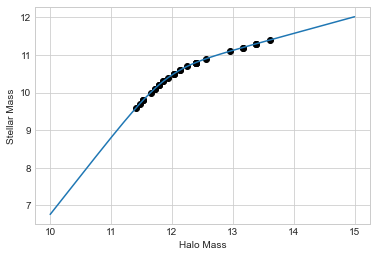

In [34]:
logm = data['log M_*']
predictedM = halo_mass(10000, logm)
print(predictedM)
plt.scatter(np.log10(predictedM), logm, color = 'black')

# Finding Circular Velocity

5.178112e+11
0.0


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


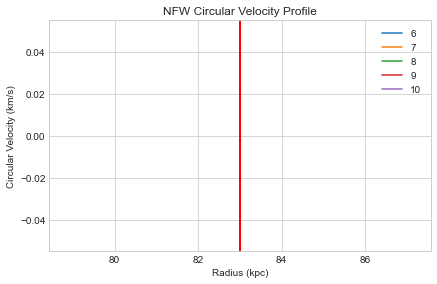

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.425708e+13
1.0


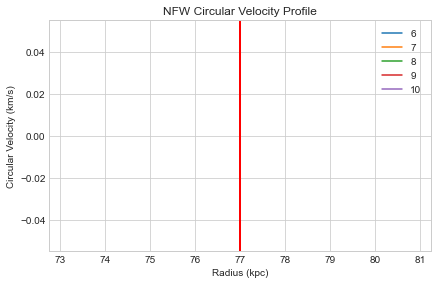

1.355855e+12
2.0


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


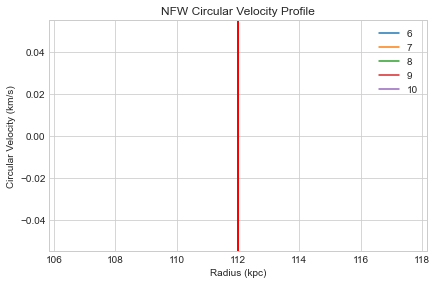

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


4.058456e+13
3.0


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


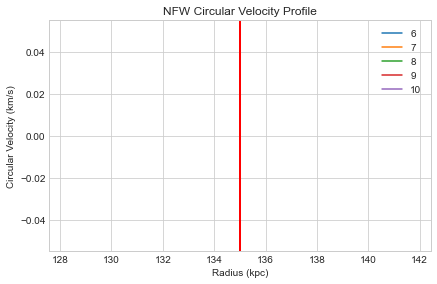

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


3.374060e+11
4.0


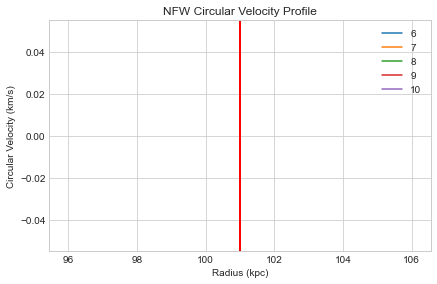

2.425708e+13
5.0


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


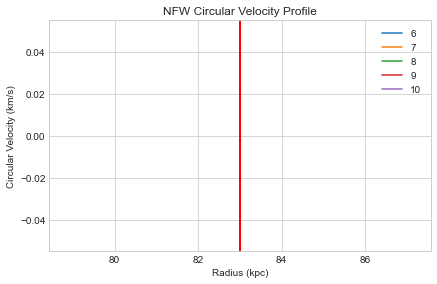

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.470241e+12
6.0


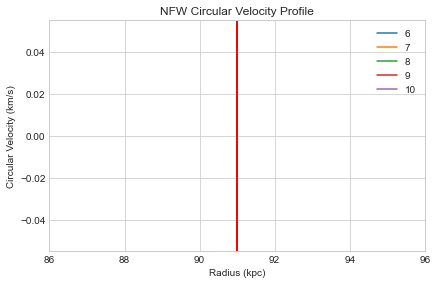

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.470241e+12
7.0


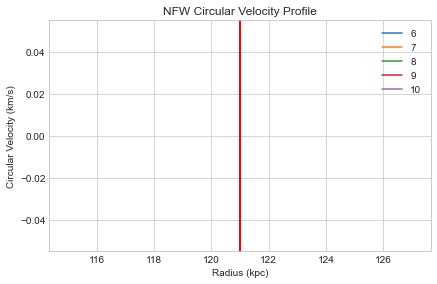

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.601007e+11
8.0


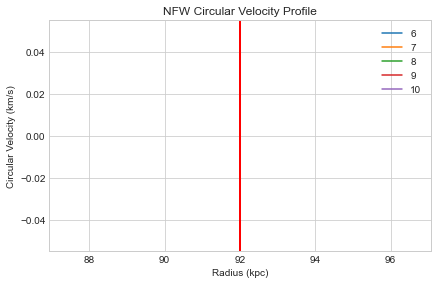

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


1.459878e+13
9.0


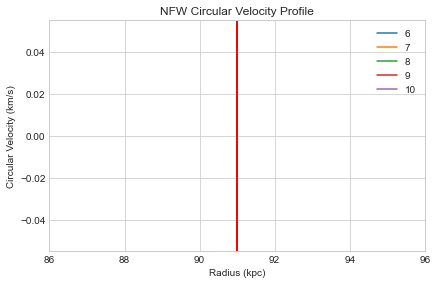

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


3.374060e+11
10.0


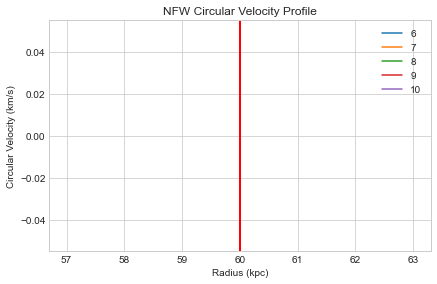

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


6.069855e+11
11.0


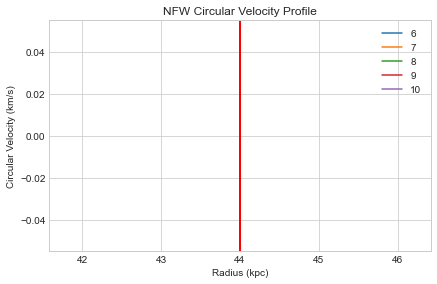

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


6.069855e+11
12.0


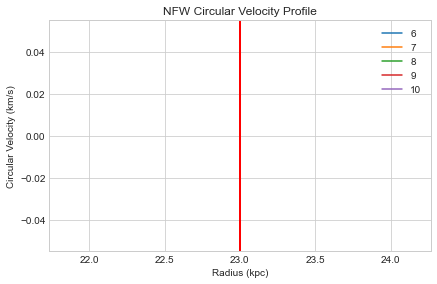

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


1.069555e+12
13.0


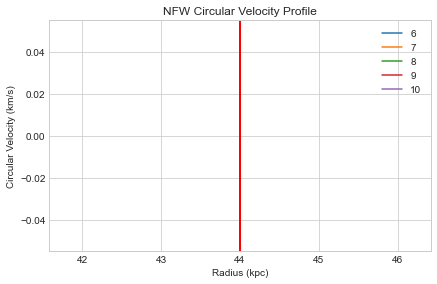

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


7.197567e+11
14.0


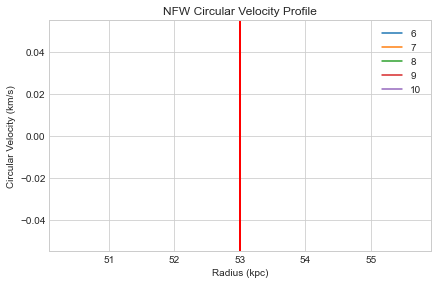

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


1.459878e+13
15.0


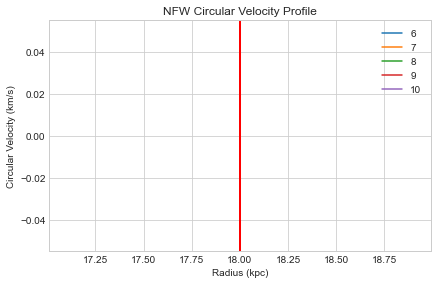

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


1.787414e+12
16.0


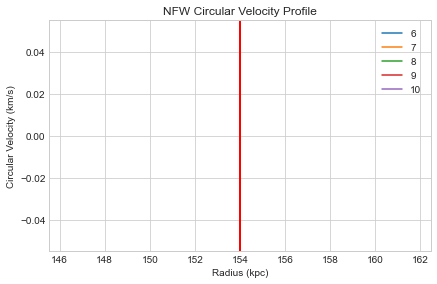

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.470241e+12
17.0


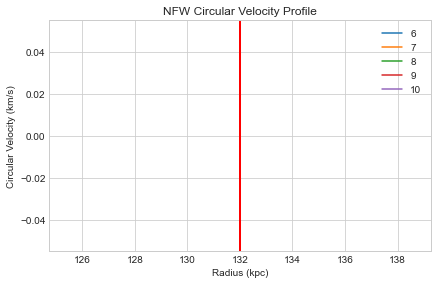

1.069555e+12
18.0


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


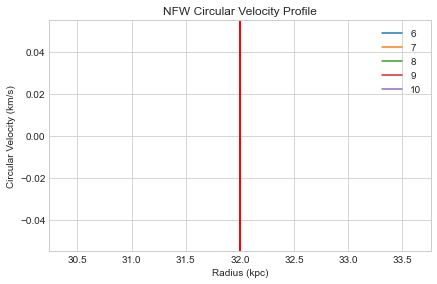

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


6.069855e+11
19.0


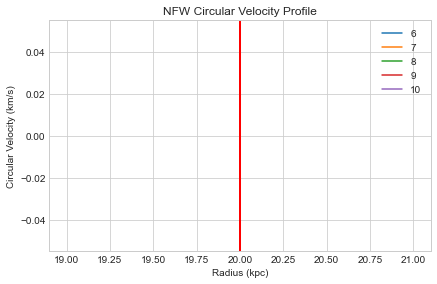

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


4.458255e+11
20.0


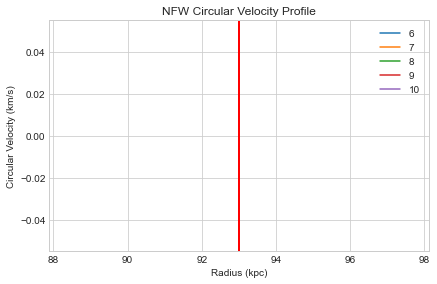

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


3.374060e+11
21.0


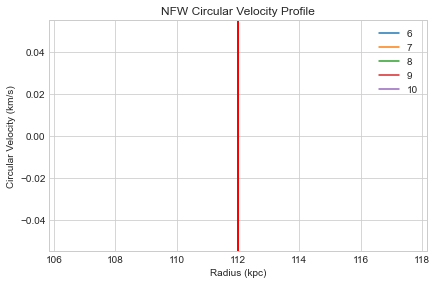

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.470241e+12
22.0


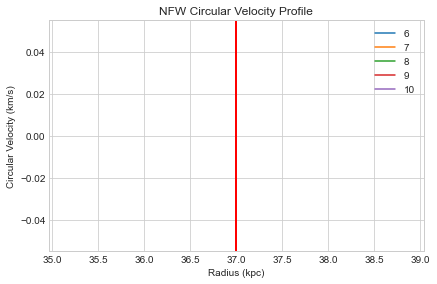

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


7.197567e+11
23.0


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


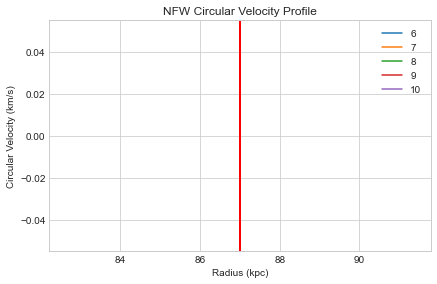

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


3.612067e+12
24.0


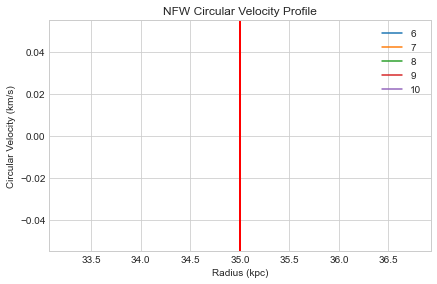

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


1.355855e+12
25.0


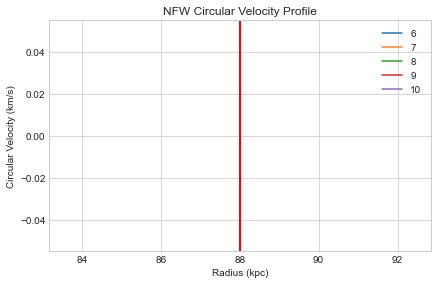

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


8.683481e+11
26.0


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


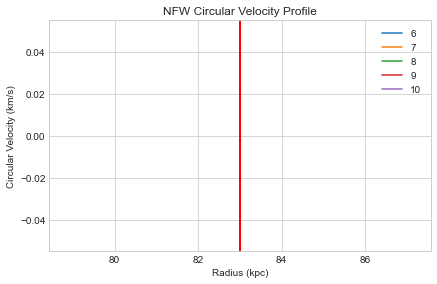

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


8.898052e+12
27.0


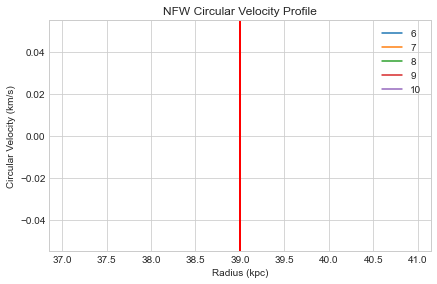

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.955610e+11
28.0


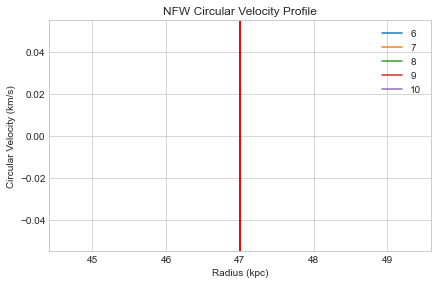

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.425708e+13
29.0


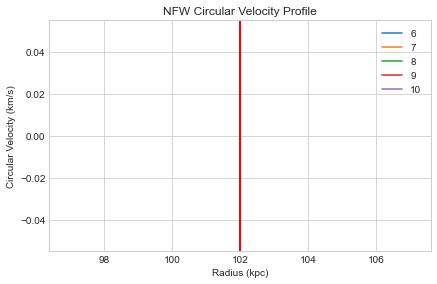

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


1.069555e+12
30.0


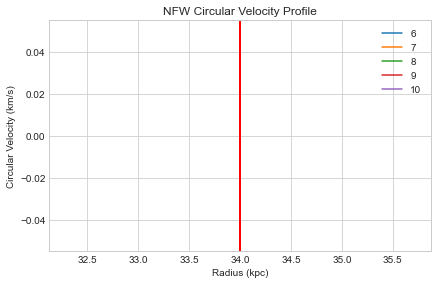

5.178112e+11
31.0


/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


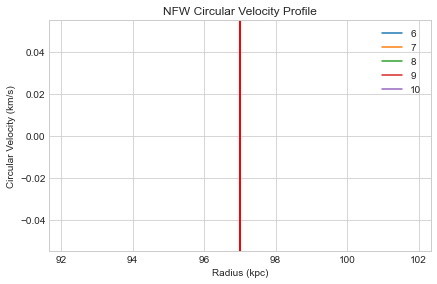

/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.470241e+12
32.0


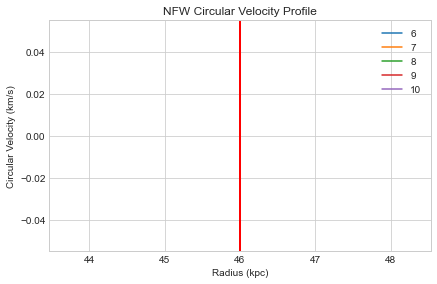

In [15]:
redshift_d = data['z']
impact_parameter_d = data['R']
counter = 0;
for mass, redshift, impact_parameter in zip(predictedM, redshift_d, impact_parameter_d): 
    for concentration in range(6,11,1): 
        cosmo = cosmology.Planck15
        massfactor = ("critical", 200)
        
        n = NFW(mass=mass, concentration=concentration, redshift=redshift, cosmo=cosmo, massfactor=massfactor)
        
        radii = range(-1,3,1000) * u.kpc
        
        # NFW circular velocity distribution
        n_result = n.circular_velocity(radii)
        
        # Plot creation
        X = plt.plot(radii, n_result, '-', label = concentration)
        plt.xscale('linear')
        v = plt.axvline(x = impact_parameter, color = 'red')
        counter = counter+1
        
    # Display plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    print("%e"%mass)
    print((counter-5)/5)
    leg = plt.legend(loc='upper right')
    plt.xlabel("Radius (kpc)")
    plt.ylabel("Circular Velocity (km/s)")
    plt.title("NFW Circular Velocity Profile")
    plt.show()

Circular Velocity Values

83 134.05430348763306 km / s
77 510.21258348149706 km / s
112 183.43068548075482 km / s
135 618.451524921208 km / s
101 110.04104426428928 km / s
83 513.2321384813996 km / s
91 234.47085431245546 km / s
121 230.4213140053146 km / s
92 102.33555196284 km / s
91 435.22941800909996 km / s
60 119.21853483839298 km / s
44 154.43032711839197 km / s
23 149.4959744149872 km / s
44 181.09407352030155 km / s
53 159.3110992310241 km / s
18 330.3523655693238 km / s
154 197.2776795711477 km / s
132 227.49075690415384 km / s
32 185.00543166922802 km / s
20 146.1938044781218 km / s
93 124.30436763865931 km / s
112 107.24392367586164 km / s
37 236.78327050423655 km / s
87 150.3368062665032 km / s
35 265.06291167573903 km / s
88 189.91927258930735 km / s
83 163.88186723392656 km / s
39 346.2770941360653 km / s
47 116.13182974316351 km / s
102 524.9985013624732 km / s
34 180.67373358423535 km / s
97 129.57960283661137 km / s
46 241.937639758548 km / s

[134.05430348763306, 510.21258348149706, 183.430685

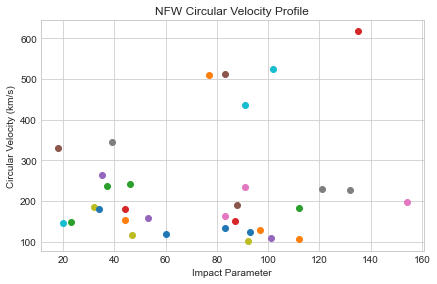

[<Quantity 134.05430349 km / s>, <Quantity 510.21258348 km / s>, <Quantity 183.43068548 km / s>, <Quantity 618.45152492 km / s>, <Quantity 110.04104426 km / s>, <Quantity 513.23213848 km / s>, <Quantity 234.47085431 km / s>, <Quantity 230.42131401 km / s>, <Quantity 102.33555196 km / s>, <Quantity 435.22941801 km / s>, <Quantity 119.21853484 km / s>, <Quantity 154.43032712 km / s>, <Quantity 149.49597441 km / s>, <Quantity 181.09407352 km / s>, <Quantity 159.31109923 km / s>, <Quantity 330.35236557 km / s>, <Quantity 197.27767957 km / s>, <Quantity 227.4907569 km / s>, <Quantity 185.00543167 km / s>, <Quantity 146.19380448 km / s>, <Quantity 124.30436764 km / s>, <Quantity 107.24392368 km / s>, <Quantity 236.7832705 km / s>, <Quantity 150.33680627 km / s>, <Quantity 265.06291168 km / s>, <Quantity 189.91927259 km / s>, <Quantity 163.88186723 km / s>, <Quantity 346.27709414 km / s>, <Quantity 116.13182974 km / s>, <Quantity 524.99850136 km / s>, <Quantity 180.67373358 km / s>, <Quantity

In [16]:
graph_vals = []
redshift_d = data['z']
impact_parameter_d = data['R']
velocity_vals = [134.05430348763306, 510.21258348149706, 183.43068548075482, 618.451524921208, 110.04104426428928, 513.2321384813996, 234.47085431245546, 230.4213140053146, 102.33555196284, 435.22941800909996, 119.21853483839298, 154.43032711839197, 149.4959744149872, 181.09407352030155, 159.3110992310241, 330.3523655693238, 197.2776795711477, 227.49075690415384, 185.00543166922802, 146.1938044781218, 124.30436763865931, 107.24392367586164, 236.78327050423655, 150.3368062665032, 265.06291167573903, 189.91927258930735, 163.88186723392656, 346.2770941360653, 116.13182974316351, 524.9985013624732, 180.67373358423535, 129.57960283661137, 241.937639758548]
for mass, redshift, impact_parameter in zip(predictedM, redshift_d, impact_parameter_d):
    cosmo = cosmology.Planck15
    massfactor = ("critical", 200)
        
    n = NFW(mass=mass, concentration=10, redshift=redshift, cosmo=cosmo, massfactor=massfactor)

    radii = range(1,300,10) * u.kpc

    # NFW circular velocity distribution
    n_result = n.circular_velocity(impact_parameter)

    # Plot creation
    plt.scatter(impact_parameter, n_result)
    print(impact_parameter, n_result)
    graph_vals.append(n_result)

# Display plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xlabel("Impact Parameter")
plt.ylabel("Circular Velocity (km/s)")
plt.title("NFW Circular Velocity Profile")
print()
print(velocity_vals)
plt.show()
print(graph_vals)

In [17]:
print(predictedM)

[517811173014.0411, 24257077952194.38, 1355854919822.7415, 40584559456616.19, 337406010890.65454, 24257077952194.38, 2470240705666.254, 2470240705666.254, 260100695898.87378, 14598775553950.787, 337406010890.65454, 606985501810.7432, 606985501810.7432, 1069554502462.7122, 719756703787.5809, 14598775553950.787, 1787414276899.6643, 2470240705666.254, 1069554502462.7122, 606985501810.7432, 445825511476.55164, 337406010890.65454, 2470240705666.254, 719756703787.5809, 3612066818361.2085, 1355854919822.7415, 868348122047.7374, 8898051796489.426, 295560957415.6108, 24257077952194.38, 1069554502462.7122, 517811173014.0411, 2470240705666.254]


In [18]:
#PG. 20 has the sfr / Use this for Data for Explain why question is important

In [19]:
for item in predictedM: 
    print(np.log10(item))

11.714171417141714
13.384838483848384
12.132213221322132
13.608360836083609
11.528152815281528
13.384838483848384
12.392739273927393
12.392739273927393
11.415141514151415
13.164316431643165
11.528152815281528
11.783178317831783
11.783178317831783
12.029202920292029
11.857185718571857
13.164316431643165
12.252225222522252
12.392739273927393
12.029202920292029
11.783178317831783
11.64916491649165
11.528152815281528
12.392739273927393
11.857185718571857
12.557755775577558
12.132213221322132
11.938693869386938
12.94929492949295
11.47064706470647
13.384838483848384
12.029202920292029
11.714171417141714
12.392739273927393
